# Logging String Data

In whylogs logging string and textual data  is simple. In this notebook we show the data that we log.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
!pip install Faker
%load_ext autoreload
%autoreload 2


In [ ]:
from faker import Faker
from collections import OrderedDict
import pandas as pd
import numpy as np
import datetime
from whylogs import get_or_create_session

# Let's create Fake String Data

In [ ]:
locales=["en-US","fr-FR","pt-BR","ru-RU","es-ES"]

fake= Faker(locales)

def random_zipcode(states=None,size=1,prob=None,locale="en-US"):
    fake= Faker(locales)
    if prob:
        assert len(prob)==len(prob)
        res=np.random.choice(states,size,p=prob)
    res=np.random.choice(states,size)
    if locale == "en-US":
        return [ fake[locale].postalcode_in_state(state) for state in res]
    else:
        return [ fake[locale].postcode() for _ in range(size) ]
    
def random_zipcode_plus4(size):
    
    return [ fake['en-US'].postalcode_plus4() for _ in range(size)]

def random_names(name_type, size):
    """
    Generate n-length ndarray of person names.
    name_type: a string, either first_names or last_names
    """
    names = getattr(Provider, name_type)
    return np.random.choice(names, size=size)


# Each cell as one daily collection

In [ ]:
list_zips = random_zipcode(["WA","OR"],1000)

session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 1)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_1= logger.profile

In [ ]:
list_zips = random_zipcode(["WA","AK"],200)

session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 2)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_2= logger.profile

In [ ]:
list_zips = random_zipcode(["NY","FL"],1000)

session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 3)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_3= logger.profile

In [ ]:

list_zips = random_zipcode_plus4(1000) + random_zipcode(["FL","TX"],200) 

session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 4)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_4= logger.profile

(<Figure size 2000x400 with 1 Axes>, <Figure size 2000x400 with 1 Axes>, None)

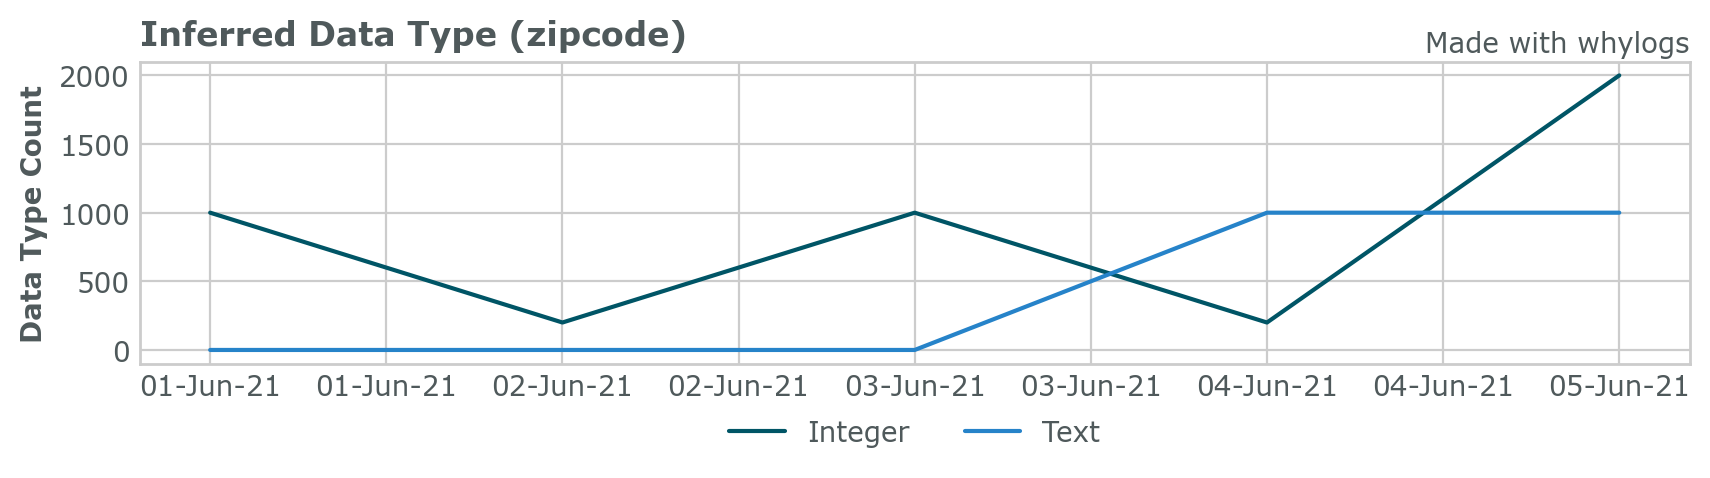

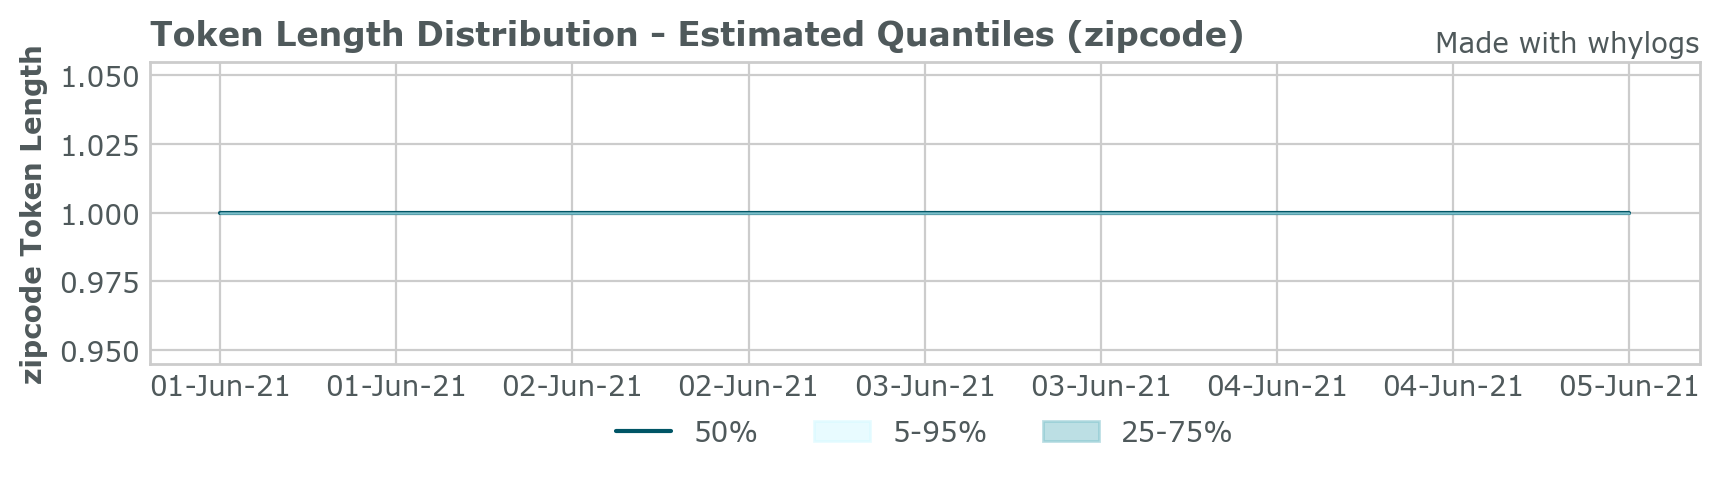

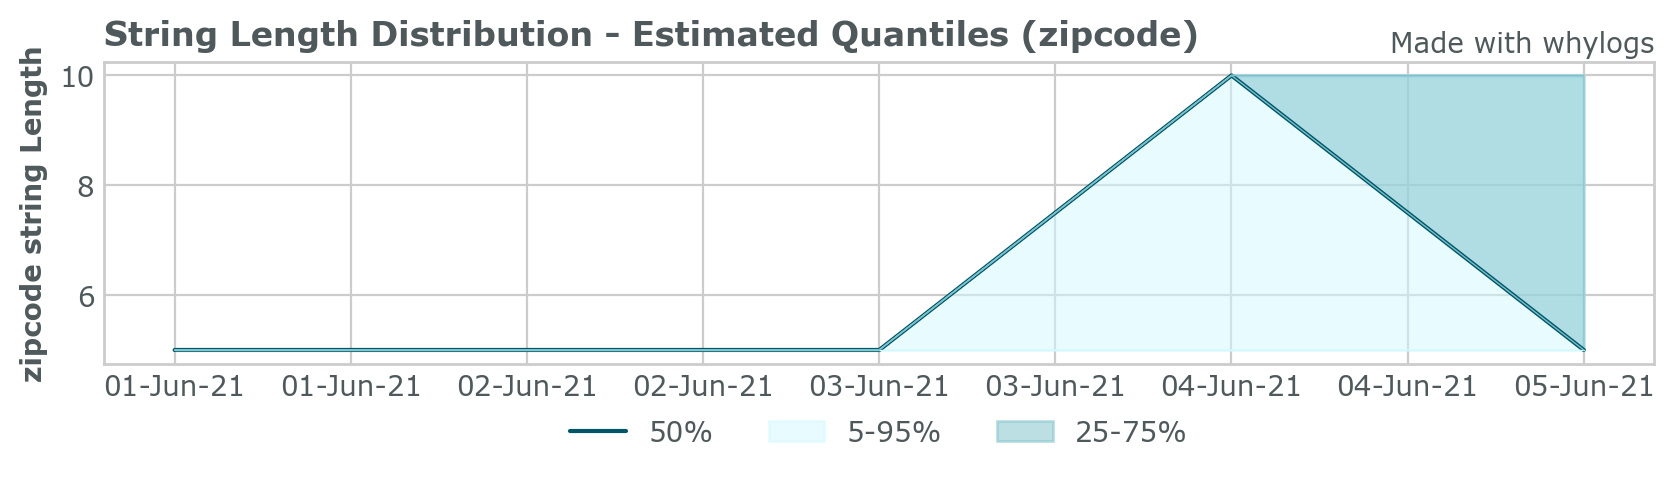

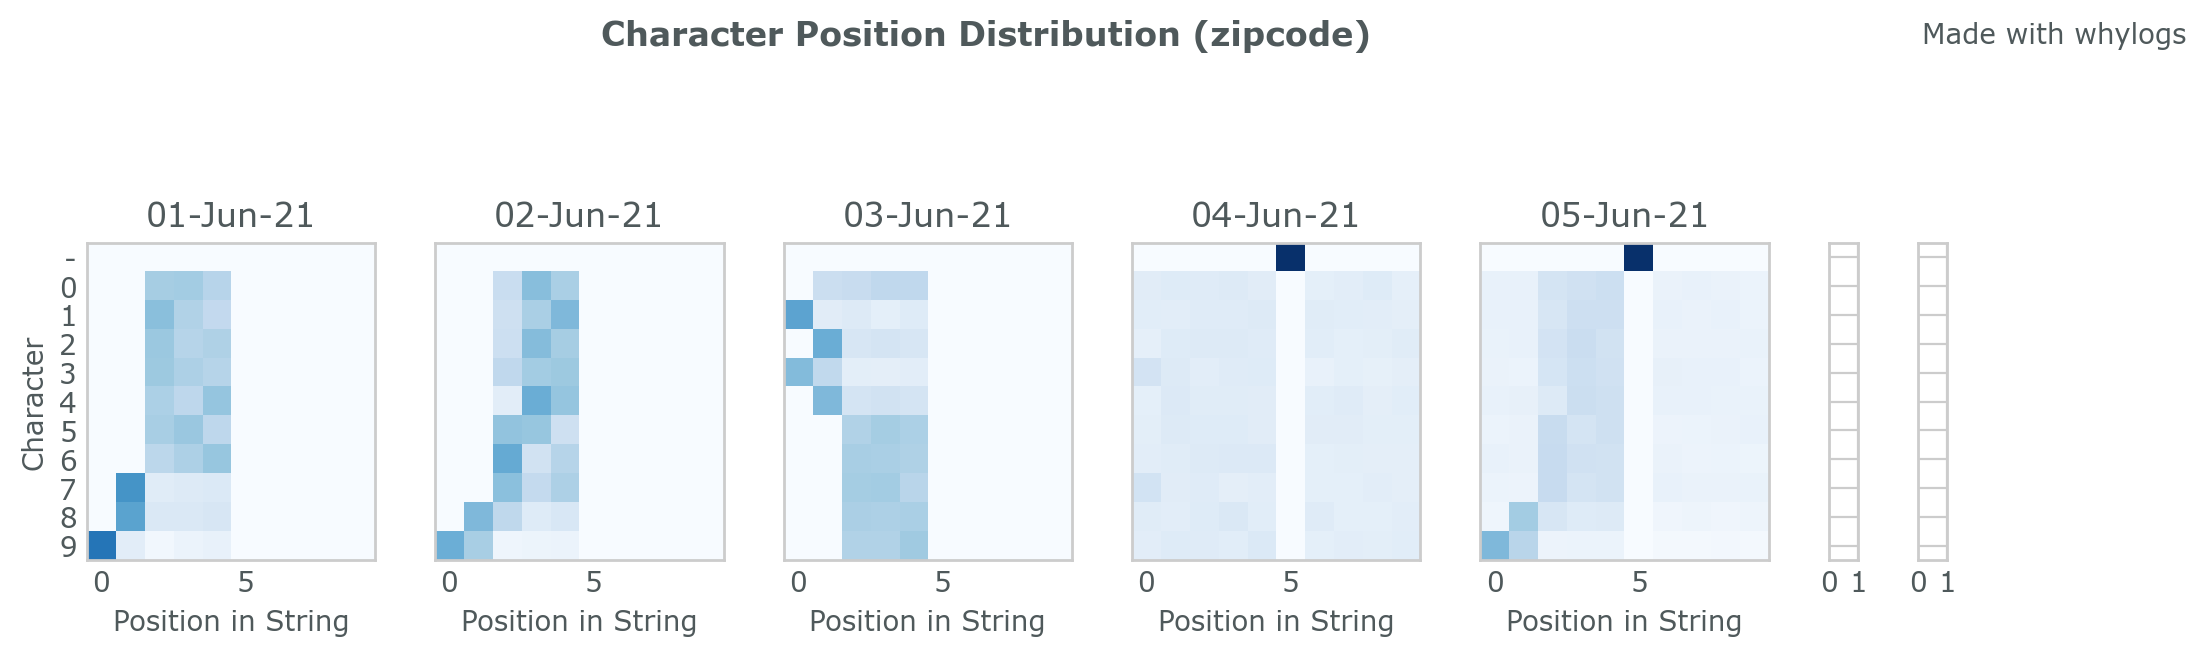

In [715]:
from whylogs.viz import ProfileVisualizer

profiles= [profile_1,profile_2,profile_3,profile_4,profile_5]
viz = ProfileVisualizer()
viz.set_profiles(profiles)
viz.plot_data_types("zipcode", ts_format="%d-%b-%y")
viz.plot_string("zipcode",character_list="-0123456789",aspect=1)

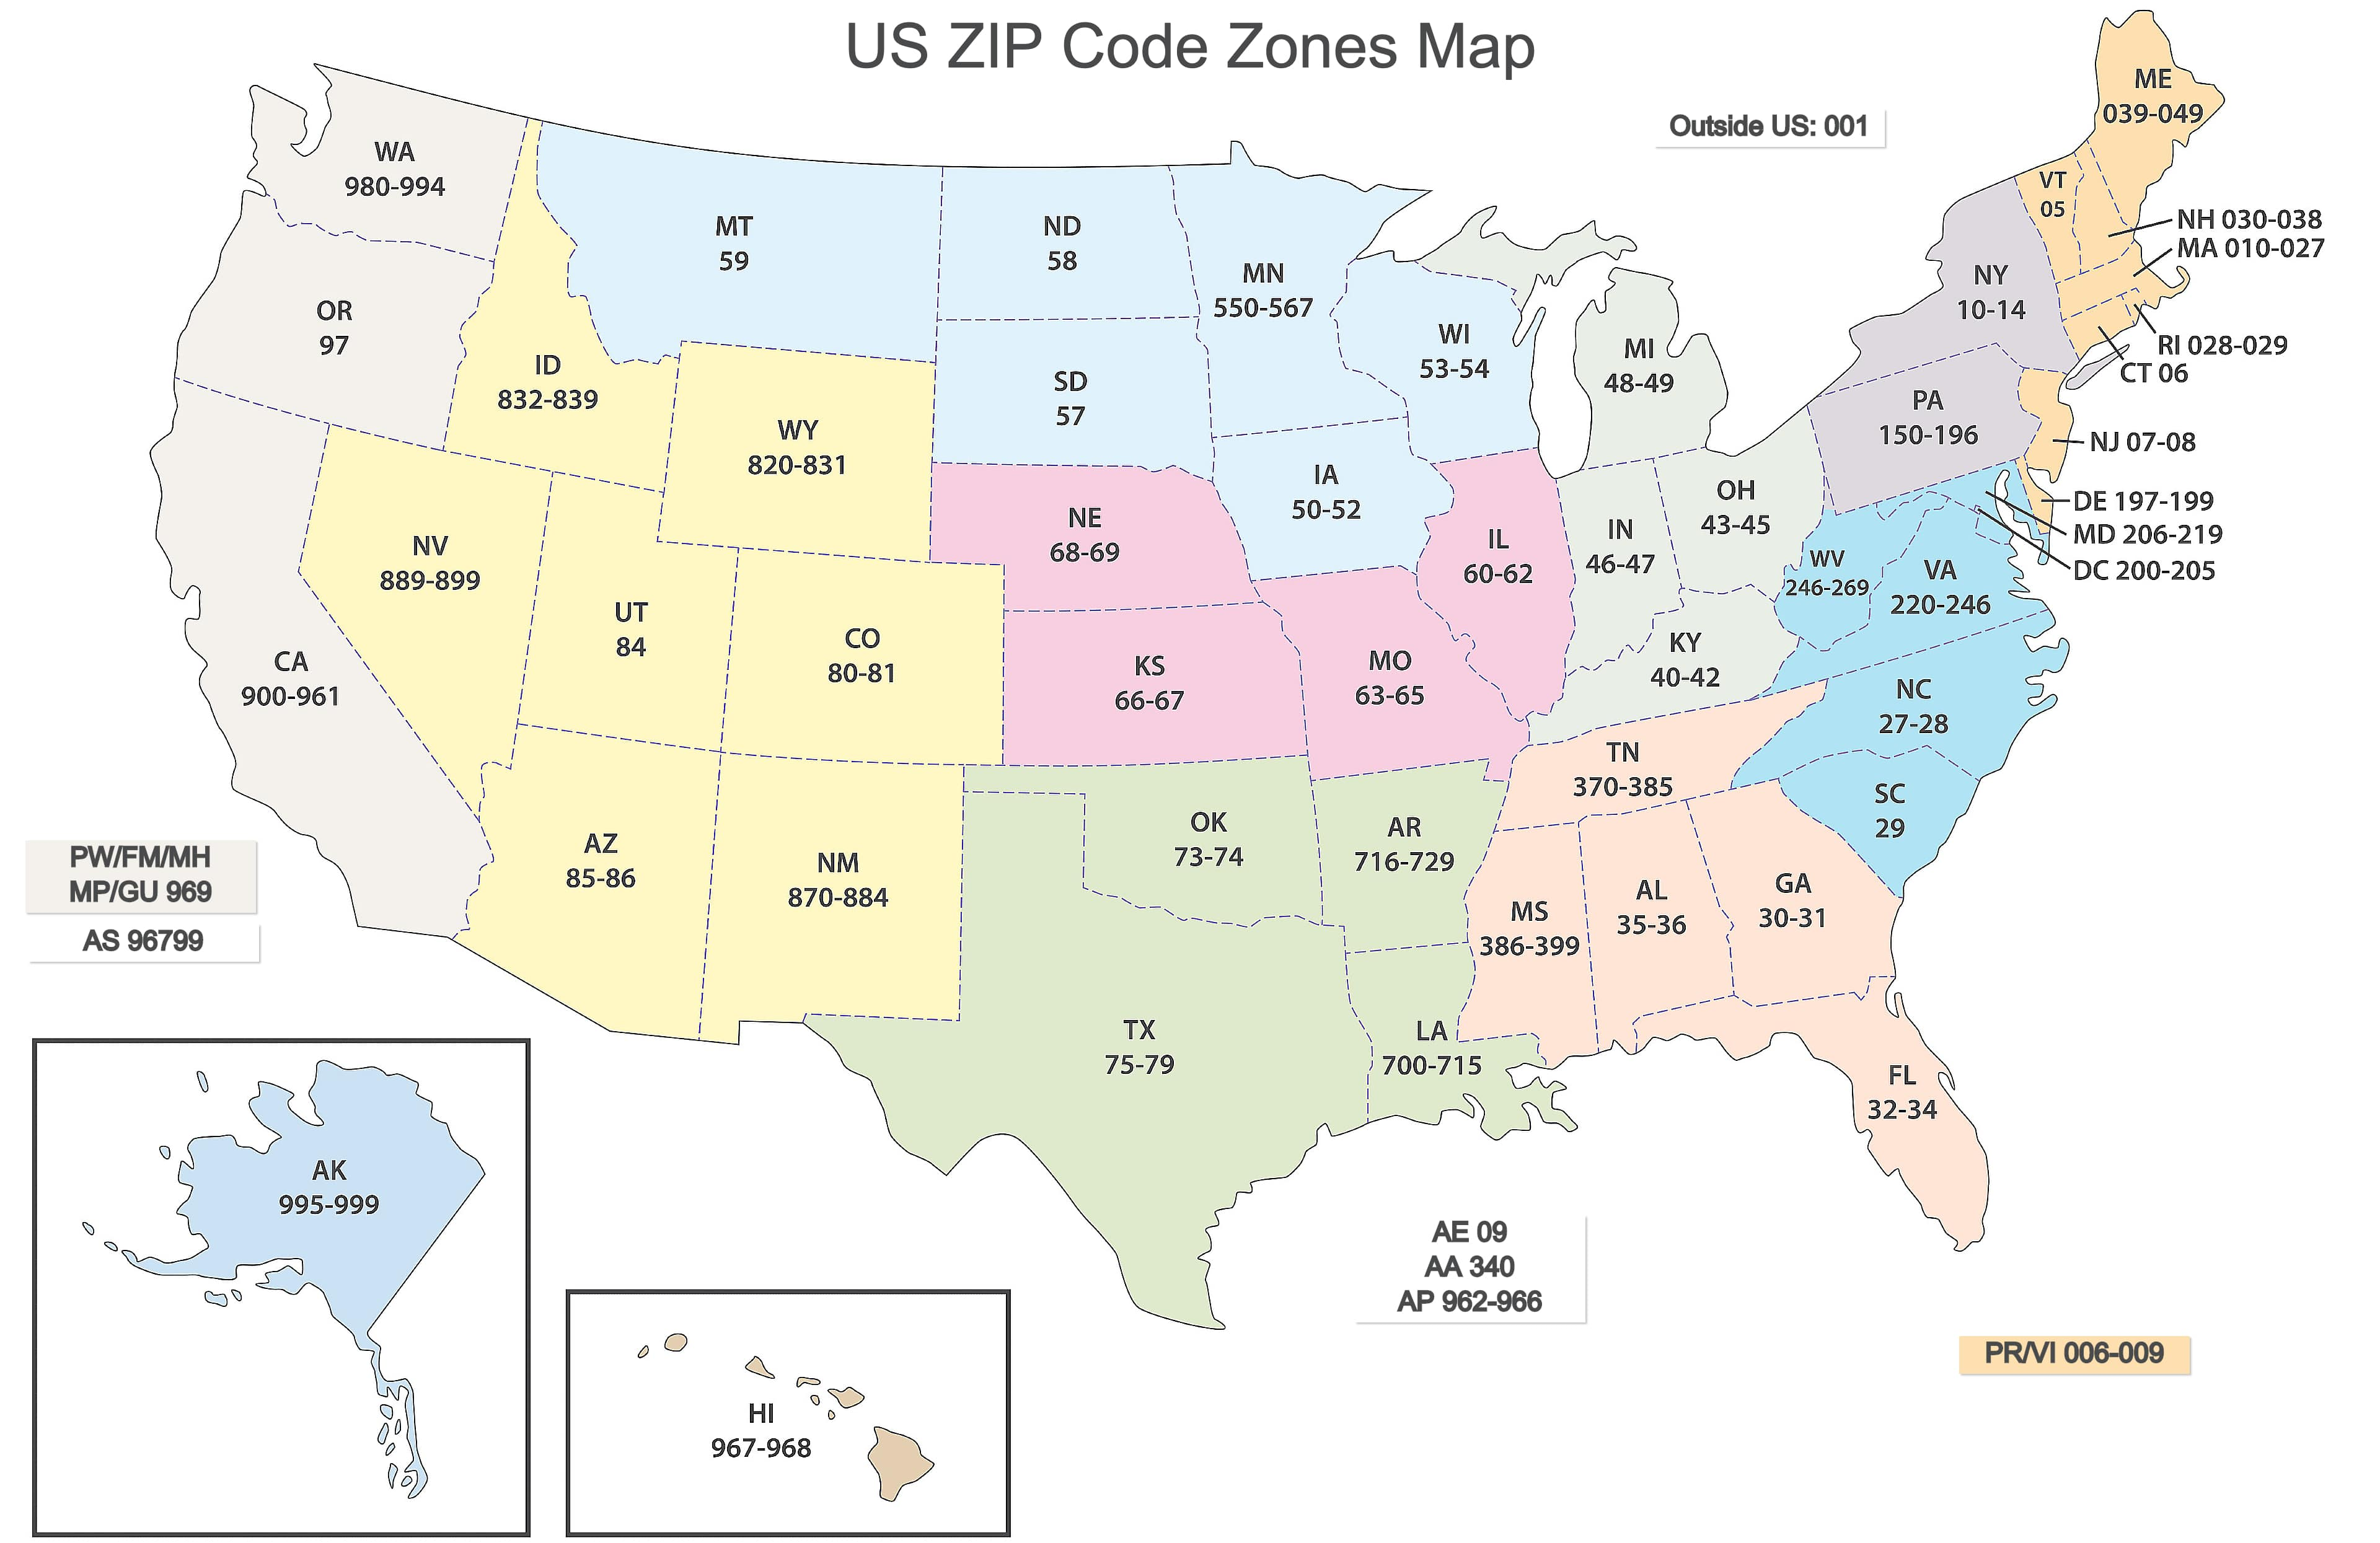

In [ ]:
def random_sentence(local):
    return fake[local].text(100)
print([random_sentence("en-US"), random_sentence("fr-FR"), random_sentence("pt-BR"), random_sentence("ru-RU"),random_sentence("es-ES")])


In [ ]:
session= get_or_create_session()
with session.logger(dataset_name='string_dataset_text',dataset_timestamp=datetime.datetime(2021, 6, 10)) as logger:
    
    for _ in range(1000):
        logger.log({"text": random_sentence("fr-FR")})
    profile_text_1= logger.profile

In [ ]:
session= get_or_create_session()
with session.logger(dataset_name='string_dataset_text',dataset_timestamp=datetime.datetime(2021, 6, 11)) as logger:
    
    for _ in range(1000):
        logger.log({"text": random_sentence("pt-BR")})
    profile_text_2= logger.profile

In [ ]:
session= get_or_create_session()
with session.logger(dataset_name='string_dataset_text',dataset_timestamp=datetime.datetime(2021, 6, 12)) as logger:
    
    for _ in range(1000):
        logger.log({"text": random_sentence("en-US")})
    profile_text_3= logger.profile

In [ ]:
session= get_or_create_session()
with session.logger(dataset_name='string_dataset_text',dataset_timestamp=datetime.datetime(2021, 6, 12)) as logger:
    
    for _ in range(1000):
        logger.log({"text": random_sentence("ru-RU")})
    profile_text_3= logger.profile

(<Figure size 2000x400 with 1 Axes>, <Figure size 2000x400 with 1 Axes>, None)

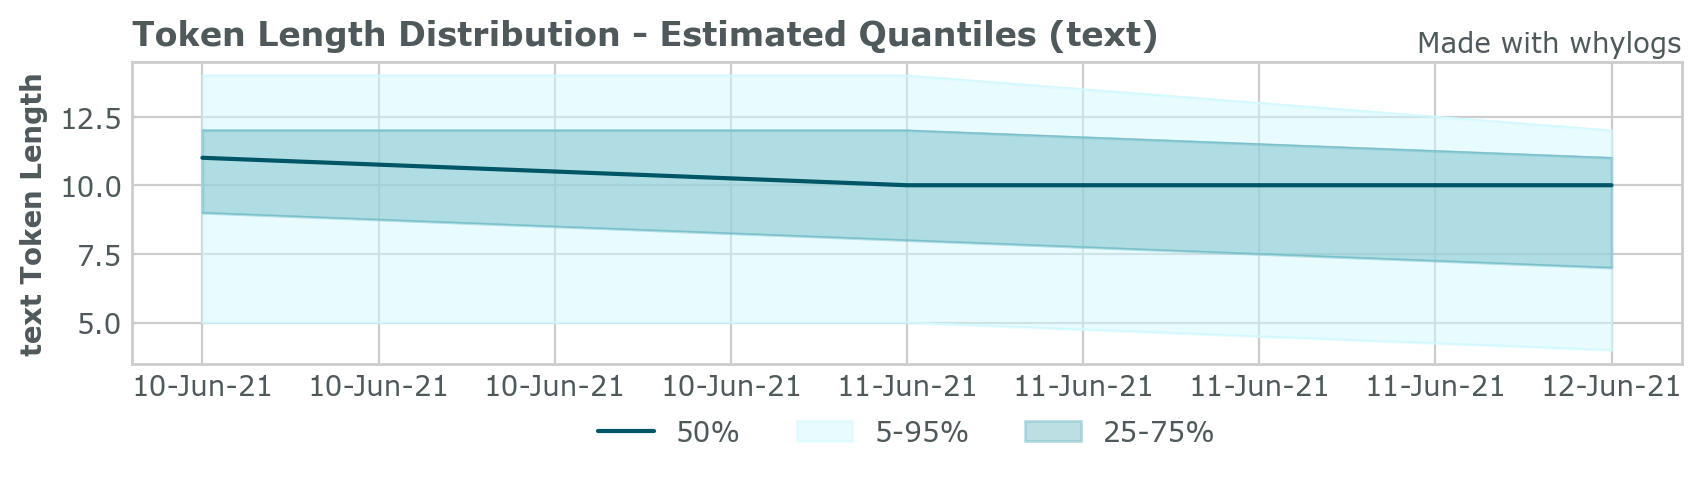

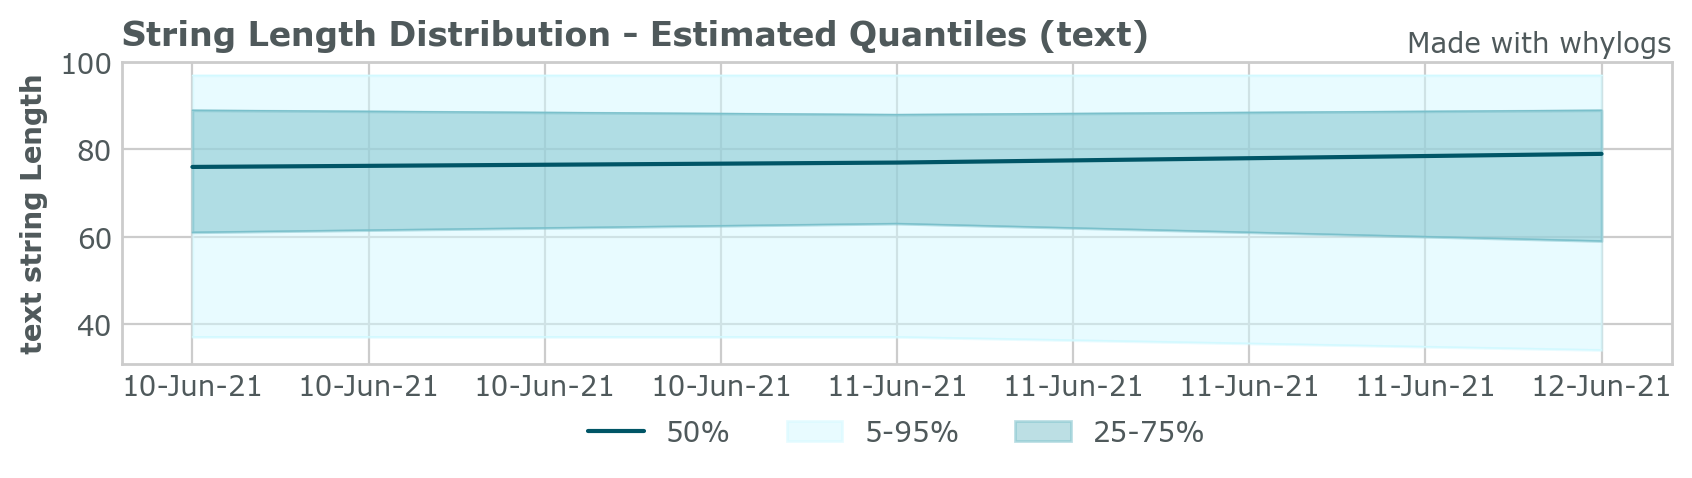

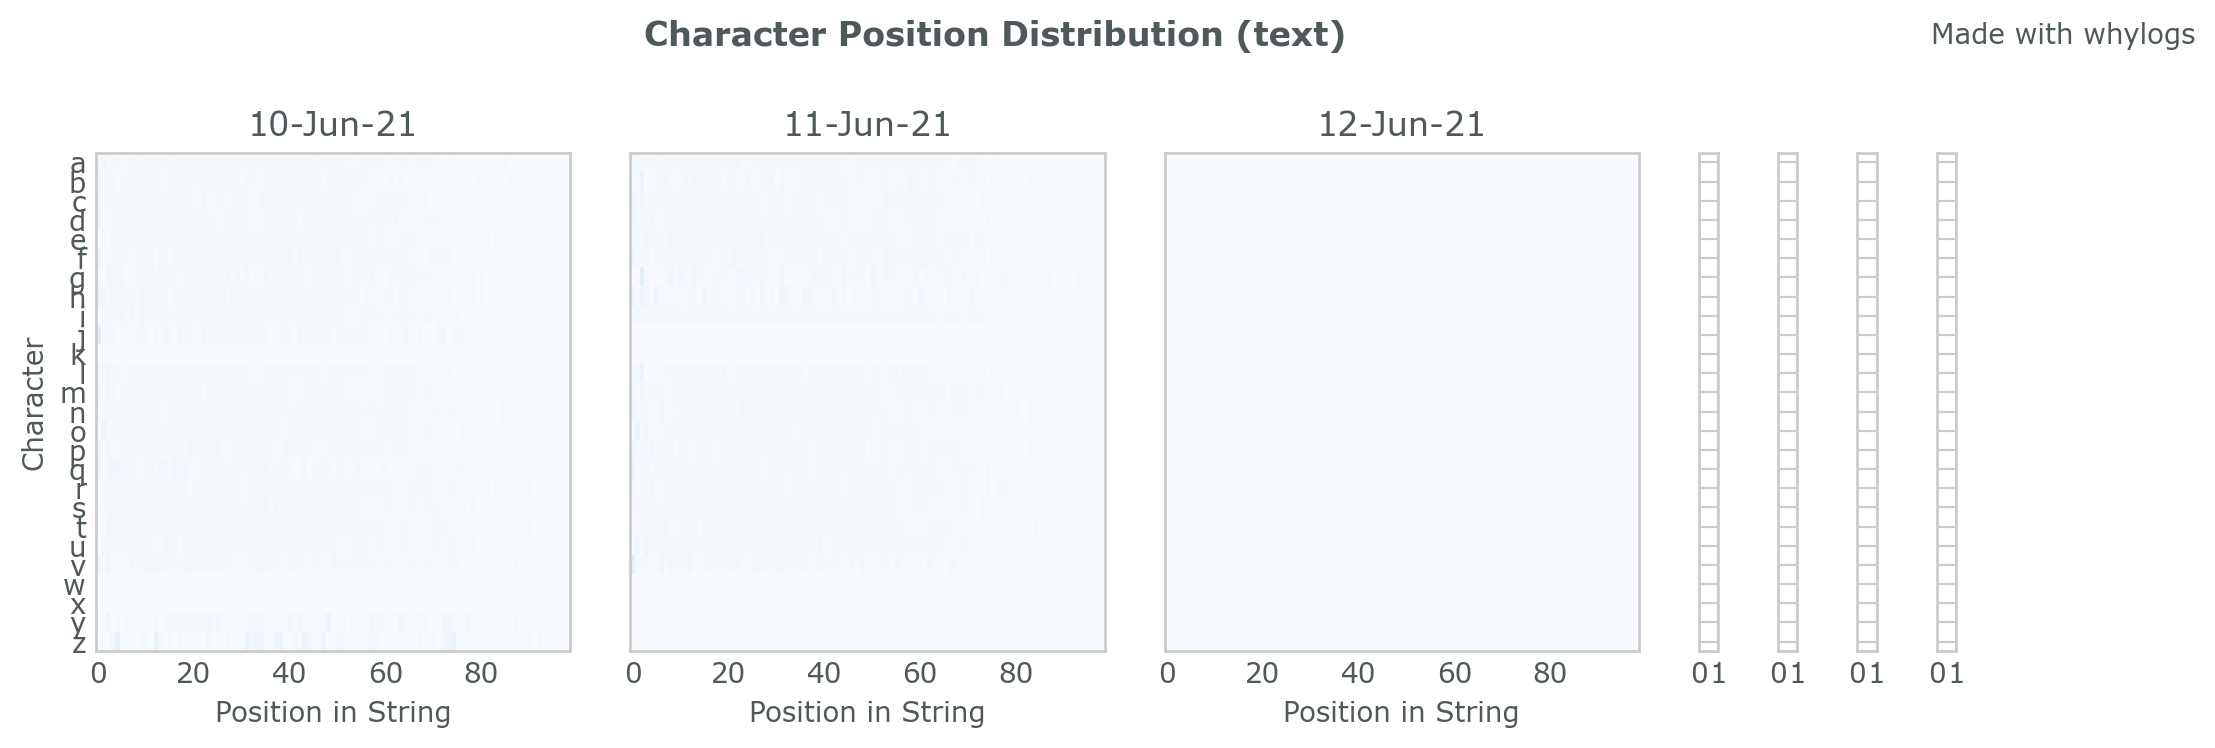

In [716]:
from whylogs.viz import ProfileVisualizer

profiles= [profile_text_1,profile_text_2,profile_text_3]
viz = ProfileVisualizer()
viz.set_profiles(profiles)
viz.plot_string("text",character_list="abcdefghijklmnopqrstuvwxyz",aspect=4)